<a href="https://colab.research.google.com/github/iftiyeamin/cprv/blob/main/bloodcell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report

In [20]:
train_dir = '/content/drive/MyDrive/dataset/dataset2-master/dataset2-master/images/TRAIN'
test_dir = '/content/drive/MyDrive/dataset/dataset2-master/dataset2-master/images/TEST'

In [21]:
# Create generators

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [22]:
# Flow image data

train_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [23]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [24]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [25]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
249/249 [==============================] - 59s 222ms/step - loss: 0.8635 - accuracy: 0.6478 - val_loss: 0.5553 - val_accuracy: 0.7994
Epoch 2/10
249/249 [==============================] - 50s 202ms/step - loss: 0.4664 - accuracy: 0.8264 - val_loss: 0.4124 - val_accuracy: 0.8446
Epoch 3/10
249/249 [==============================] - 49s 198ms/step - loss: 0.3482 - accuracy: 0.8725 - val_loss: 0.3303 - val_accuracy: 0.8753
Epoch 4/10
249/249 [==============================] - 49s 199ms/step - loss: 0.2716 - accuracy: 0.9044 - val_loss: 0.3269 - val_accuracy: 0.8768
Epoch 5/10
249/249 [==============================] - 51s 207ms/step - loss: 0.2059 - accuracy: 0.9300 - val_loss: 0.2606 - val_accuracy: 0.8989
Epoch 6/10
249/249 [==============================] - 51s 205ms/step - loss: 0.1725 - accuracy: 0.9413 - val_loss: 0.2432 - val_accuracy: 0.9090
Epoch 7/10
249/249 [==============================] - 51s 204ms/step - loss: 0.1360 - accuracy: 0.9567 - val_loss: 0.2182 - val_ac

In [10]:
CLASS_NAMES = list(train_images.class_indices.keys())
CLASS_NAMES

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

Test Accuracy: 49.698%


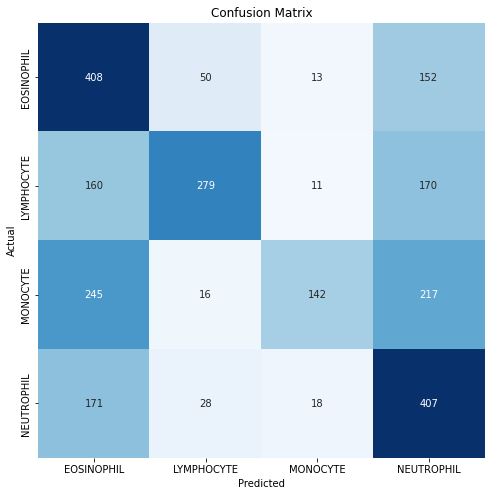

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.41      0.65      0.51       623
  LYMPHOCYTE       0.75      0.45      0.56       620
    MONOCYTE       0.77      0.23      0.35       620
  NEUTROPHIL       0.43      0.65      0.52       624

    accuracy                           0.50      2487
   macro avg       0.59      0.50      0.49      2487
weighted avg       0.59      0.50      0.49      2487



In [32]:
predictions = np.argmax(model.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
cm = tf.math.confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

Found 1989 images belonging to 4 classes.
Validation Accuracy: 92.207%


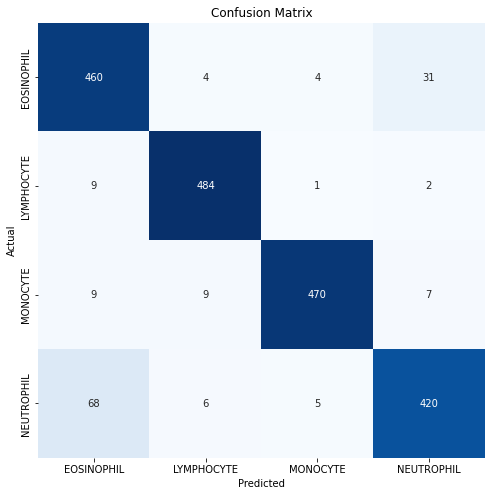

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.84      0.92      0.88       499
  LYMPHOCYTE       0.96      0.98      0.97       496
    MONOCYTE       0.98      0.95      0.96       495
  NEUTROPHIL       0.91      0.84      0.88       499

    accuracy                           0.92      1989
   macro avg       0.92      0.92      0.92      1989
weighted avg       0.92      0.92      0.92      1989



In [34]:
val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='validation'
)


predictions = np.argmax(model.predict(val_images), axis=1)

acc = accuracy_score(val_images.labels, predictions)
cm = tf.math.confusion_matrix(val_images.labels, predictions)
clr = classification_report(val_images.labels, predictions, target_names=CLASS_NAMES)

print("Validation Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)